In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib widget

In [2]:
OMG_CH = [str(i) for i in range(50)]
GLOVE_CH = ['GLOVE_THUMB', 'GLOVE_INDEX', 'GLOVE_MIDDLE', 'GLOVE_RING', 'GLOVE_PINKY']

# Data

In [3]:
gestures_train = pd.read_csv('gestures_train.csv', index_col=0)

print(gestures_train.shape)
gestures_train.head()

(33172, 57)


,0,1,2,3,4,5,6,7,8,9,...,47,48,49,SYNC,ts,GLOVE_THUMB,GLOVE_INDEX,GLOVE_MIDDLE,GLOVE_RING,GLOVE_PINKY
0,1605,0,1739,94,6,2618,30,29,2058,40,...,4,9,48,0,6492378,0.0,82.329818,213.329818,280.164909,115.494726
1,1604,8,1738,94,7,2618,30,28,2062,40,...,6,7,18,0,6492411,0.0,81.000000,209.028976,279.028976,114.000000
2,1607,9,1739,94,7,2624,32,28,2064,43,...,4,8,12,0,6492444,0.0,81.000000,209.000000,279.000000,114.000000
3,1597,2,1743,93,5,2612,31,31,2052,39,...,2,10,6,0,6492477,0.0,80.376222,209.000000,279.000000,113.000000
4,1595,7,1722,91,8,2603,32,26,2052,37,...,4,10,14,0,6492510,0.0,81.000000,209.000000,279.000000,114.000000


In [4]:
# [X features] '0', ..., '49' - каналы OMG датчиков 
# [y target]   'GLOVE_THUMB', 'GLOVE_INDEX', 'GLOVE_MIDDLE', 'GLOVE_RING', 'GLOVE_PINKY' - координаты пальцев в перчатке GLOVE
# 'ts' - метка времени
# 'SYNC' - синхронизация данных с протоколом
gestures_train.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', 'SYNC', 'ts', 'GLOVE_THUMB', 'GLOVE_INDEX', 'GLOVE_MIDDLE',
       'GLOVE_RING', 'GLOVE_PINKY'],
      dtype='object')

In [5]:
gestures_test = pd.read_csv('gestures_test.csv', index_col=0)

print(gestures_test.shape)
gestures_test.head()

(8168, 57)


,0,1,2,3,4,5,6,7,8,9,...,47,48,49,SYNC,ts,GLOVE_THUMB,GLOVE_INDEX,GLOVE_MIDDLE,GLOVE_RING,GLOVE_PINKY
33172,1469,11,1858,99,4,2552,29,39,2190,38,...,5,11,4,433,7587054,0.0,8.988677,45.011323,166.000000,59.000000
33173,1460,11,1857,99,6,2549,31,32,2190,41,...,6,13,5,433,7587087,0.0,9.000000,45.000000,166.000000,59.191277
33174,1471,9,1860,101,6,2554,29,35,2193,39,...,3,10,2,433,7587120,0.0,8.606124,45.000000,166.000000,59.606124
33175,1467,8,1856,98,0,2549,27,36,2190,40,...,4,10,17,433,7587153,0.0,9.000000,45.596475,166.000000,59.403525
33176,1471,6,1859,99,3,2554,28,36,2187,40,...,3,10,10,433,7587186,0.0,9.000000,45.000000,165.200926,59.200926


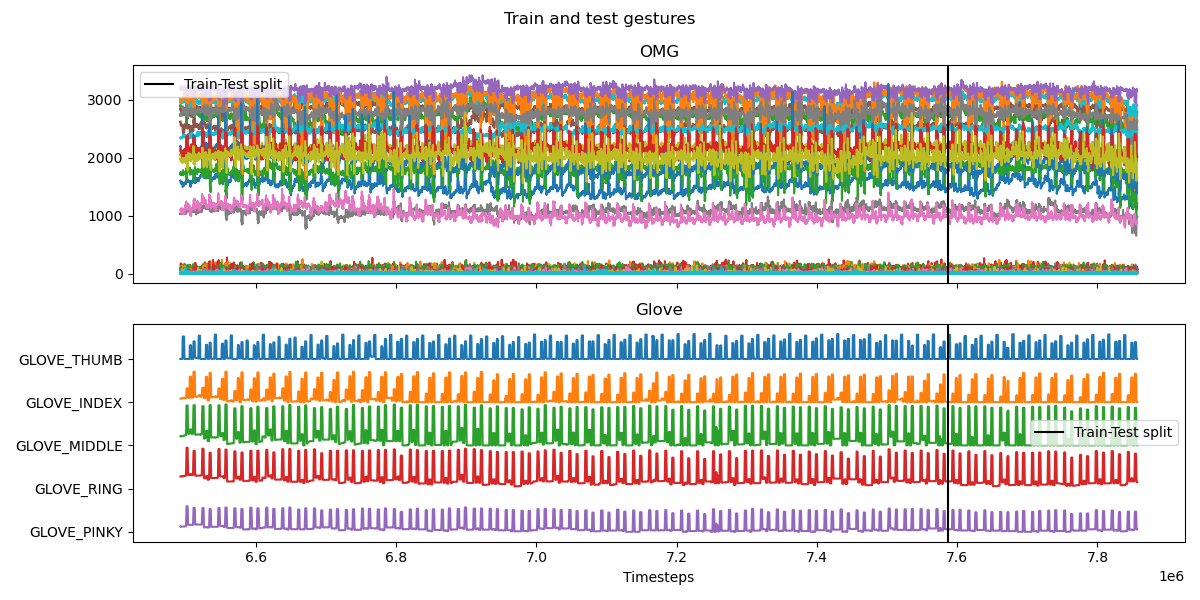

In [6]:
fig, axx = plt.subplots(2, 1, sharex=True, figsize=(12, 6))
plt.sca(axx[0])
plot_train = plt.plot(gestures_train['ts'].values, gestures_train[OMG_CH].values)
plot_test = plt.plot(gestures_test['ts'].values, gestures_test[OMG_CH].values)
for p_train, p_test in zip(plot_train, plot_test):
    p_test.set_color(p_train.get_color())
plt.axvline(gestures_train['ts'].values[-1], color='k', label='Train-Test split')
plt.title('OMG')
plt.legend()

plt.sca(axx[1])
plot_train = plt.plot(gestures_train['ts'].values, gestures_train[GLOVE_CH].values - np.arange(len(GLOVE_CH)) * 1000)
plot_test = plt.plot(gestures_test['ts'].values, gestures_test[GLOVE_CH].values - np.arange(len(GLOVE_CH)) * 1000)
for p_train, p_test in zip(plot_train, plot_test):
    p_test.set_color(p_train.get_color())
plt.axvline(gestures_train['ts'].values[-1], color='k', label='Train-Test split')
plt.yticks(-np.arange(len(GLOVE_CH)) * 1000, GLOVE_CH)
plt.legend()
plt.title('Glove')
plt.xlabel('Timesteps')

plt.suptitle('Train and test gestures')
plt.tight_layout()

## Protocol

In [7]:
gestures_protocol = pd.read_csv('gestures_protocol.csv')
gestures_protocol.head(10)

,epoch,Thumb,Index,Middle,Ring,Pinky,id
0,0,0,0,0,0,0,1
1,1,100,0,0,0,0,2
2,2,0,0,0,0,0,3
3,3,0,0,100,100,100,4
4,4,0,0,0,0,0,5
5,5,100,100,0,0,0,6
6,6,0,0,0,0,0,7
7,7,100,100,100,100,100,8
8,8,0,0,0,0,0,9
9,9,0,0,0,0,0,1


In [8]:
gestures_train_ext = pd.merge(
    gestures_train,
    gestures_protocol,
    how='left',
    left_on='SYNC',
    right_on='epoch',
)

gestures_test_ext = pd.merge(
    gestures_test,
    gestures_protocol,
    how='left',
    left_on='SYNC',
    right_on='epoch',
)

In [9]:
gestures_train_ext.isna().sum().unique(), gestures_test_ext.isna().sum().unique()

(array([0]), array([0]))

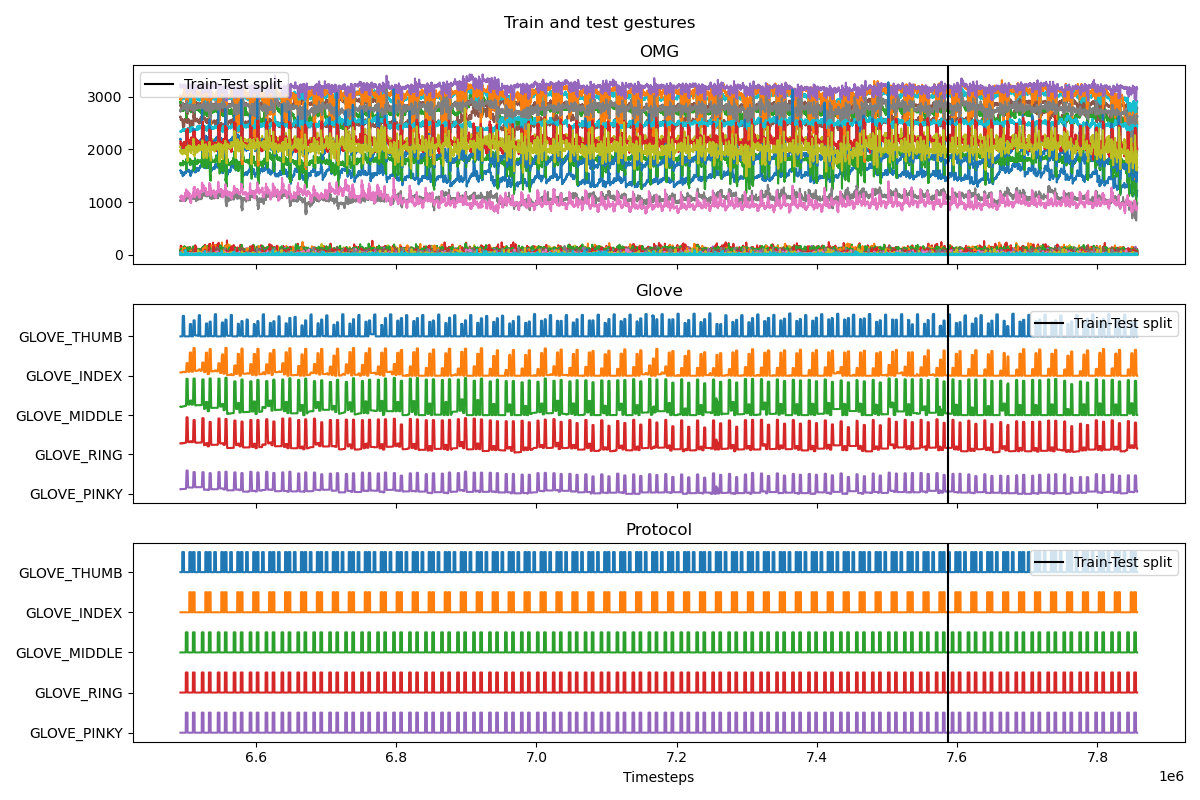

In [10]:
fig, axx = plt.subplots(3, 1, sharex=True, figsize=(12, 8))
plt.sca(axx[0])
plot_train = plt.plot(gestures_train_ext['ts'].values, gestures_train_ext[OMG_CH].values)
plot_test = plt.plot(gestures_test_ext['ts'].values, gestures_test_ext[OMG_CH].values)
for p_train, p_test in zip(plot_train, plot_test):
    p_test.set_color(p_train.get_color())
plt.axvline(gestures_train_ext['ts'].values[-1], color='k', label='Train-Test split')
plt.legend()
plt.title('OMG')

plt.sca(axx[1])
plot_train = plt.plot(gestures_train_ext['ts'].values, gestures_train_ext[GLOVE_CH].values - np.arange(len(GLOVE_CH)) * 1000)
plot_test = plt.plot(gestures_test_ext['ts'].values, gestures_test_ext[GLOVE_CH].values - np.arange(len(GLOVE_CH)) * 1000)
for p_train, p_test in zip(plot_train, plot_test):
    p_test.set_color(p_train.get_color())
plt.yticks(-np.arange(len(GLOVE_CH)) * 1000, GLOVE_CH)
plt.axvline(gestures_train_ext['ts'].values[-1], color='k', label='Train-Test split')
plt.legend()
plt.title('Glove')

plt.sca(axx[2])
plot_train = plt.plot(
    gestures_train_ext['ts'].values,
    gestures_train_ext[['Thumb', 'Index', 'Middle', 'Ring', 'Pinky']].values - np.arange(len(GLOVE_CH)) * 200
)
plot_test = plt.plot(
    gestures_test_ext['ts'].values,
    gestures_test_ext[['Thumb', 'Index', 'Middle', 'Ring', 'Pinky']].values - np.arange(len(GLOVE_CH)) * 200
)
for p_train, p_test in zip(plot_train, plot_test):
    p_test.set_color(p_train.get_color())
plt.yticks(-np.arange(len(GLOVE_CH)) * 200, GLOVE_CH)
plt.axvline(gestures_train_ext['ts'].values[-1], color='k', label='Train-Test split')
plt.legend()
plt.xlabel('Timesteps')
plt.title('Protocol')

plt.suptitle('Train and test gestures')
plt.tight_layout()

# Real-time inference

In [11]:
import time
import serial
from IPython.display import clear_output

In [12]:
crc_table = [
    54, 181, 83, 241, 89, 16, 164, 217, 34, 169, 220, 160, 11, 252,
    111, 241, 33, 70, 99, 240, 234, 215, 60, 206, 68, 126, 152, 81,
    113, 187, 14, 21, 164, 172, 251, 16, 248, 215, 236, 90, 49, 53,
    179, 156, 101, 55, 65, 130, 161, 22, 218, 79, 24, 168, 152, 205,
    115, 141, 23, 86, 141, 58, 122, 215, 252, 48, 69, 115, 138, 66,
    88, 37, 63, 104, 176, 46, 139, 246, 222, 184, 103, 92, 154, 174,
    97, 141, 195, 166, 227, 150, 140, 48, 121, 243, 13, 131, 210, 199,
    45, 75, 180, 104, 97, 82, 251, 90, 132, 111, 229, 175, 146, 216,
    153, 86, 166, 33, 184, 100, 225, 248, 186, 54, 89, 39, 2, 214, 2,
    114, 197, 6, 35, 188, 245, 64, 220, 37, 123, 132, 190, 60, 189, 53,
    215, 185, 238, 145, 99, 226, 79, 54, 102, 118, 210, 116, 51, 247,
    0, 191, 42, 45, 2, 132, 106, 52, 63, 159, 229, 157, 78, 165, 50,
    18, 108, 193, 166, 253, 3, 243, 126, 111, 199, 152, 36, 114, 147,
    57, 87, 14, 16, 160, 128, 97, 189, 51, 115, 142, 8, 70, 71, 55, 42,
    193, 65, 207, 122, 158, 26, 21, 72, 139, 33, 230, 230, 116, 134, 5,
    213, 165, 107, 41, 134, 219, 190, 26, 29, 136, 174, 190, 108, 185, 172,
    137, 239, 164, 208, 207, 206, 98, 207, 12, 0, 174, 64, 20, 90, 49, 12,
    67, 112, 109, 78, 114, 165, 244, 183, 121
];
    
def get_crc(data, count):
    result = 0x00
    l = count
    while (count>0):   
        result = crc_table[result ^ data[l-count]]
        count -= 1;
    return result;

N_PACK_REPEATS = 3
INTERPACK_DELAY_MS = 50

def drv_abs_one(ser, control):
    if ser is None:
        return
    pack = (np.array([80, 0x01, 0xBB, 6] + [c for c in control] + [0], dtype='uint8'))
    pack[-1] = get_crc(pack[1:], 9)
    return (pack, ser.write(bytearray(pack)))

def drv_abs(ser, control, repeats, delay_ms):
    con = list(np.clip(control, 0, 100))
    print(time.time(), 'Command', con, end=' '*100+'\n\r')
    for r in range(repeats):
        drv_abs_one(ser, con)
        # time.sleep(delay_ms*1e-3)

In [13]:
TIMEOUT = 0.033
DATA = gestures_test[OMG_CH].values
SEQ_LEN = len(DATA)
SEQ_LEN

8168

In [14]:
ser = None
ser_port = None
# ser_port = '/dev/cu.usbmodem3479355B31351'

if ser_port is not None:
    ser = serial.Serial(port=ser_port, timeout=1)
    ser.write('T1#\r\n'.encode('utf-8')) # T1 for Timestamp activate
    ser.write('M2#\r\n'.encode('utf-8')) # M2 for Mode == 2 = send samples

    # flush buffers
    ser.reset_input_buffer()
    ser.read()

    while(ser.in_waiting):
        ser.read(ser.in_waiting)

for i in range(SEQ_LEN)[:100]: # TODO: remove [:100]
    ts_start = time.time()

    clear_output(wait=True)
    print(f'STEP: {i} / {SEQ_LEN}')
    print('DATA:\n', DATA[i])

    # model output
    y_pred = np.random.rand(5) # TODO: replace by your fitted model
    # some post processing
    # from raw model output to command for prosthesis
    y_cmd = (y_pred.clip(0, 1) * 100).round().astype(int).tolist()
    # send to prosthesis
    # TODO: команда тормозит инференс
    drv_abs(ser, y_cmd, N_PACK_REPEATS, INTERPACK_DELAY_MS);
    # TODO: recieve data from prosthesis
    # 

    print('MODEL OUTPUT:\n', y_pred)
    print('COMMAND:\n', y_cmd)

    ts_end = time.time()

    if ts_end - ts_start < TIMEOUT:
        time.sleep(TIMEOUT - (ts_end - ts_start))

STEP: 99 / 8168
DATA:
 [1535    1 1883   98    6 2630   28   34 2198   40   44   43 2759   20
   58 2848   10 1071   73 3012   13 3170   90   11 3198   66    6 2806
    9 2483 1865   38   90 2182   16   66  963   13 1970   20   17   10
    9   40    7   10   23    8   10    7]
1681924956.701435 Command [70, 10, 17, 79, 73]                                                                                                    
MODEL OUTPUT:
 [0.69534932 0.0991531  0.17167752 0.78779023 0.73076935]
COMMAND:
 [70, 10, 17, 79, 73]


---

# Free movments

In [15]:
free_movements = pd.read_csv('free_movements.csv', index_col=0)

print(free_movements.shape)
free_movements.head()

(20990, 57)


,0,1,2,3,4,5,6,7,8,9,...,47,48,49,SYNC,ts,GLOVE_THUMB,GLOVE_INDEX,GLOVE_MIDDLE,GLOVE_RING,GLOVE_PINKY
140,1203,22,1594,123,10,2390,24,32,1848,40,...,5,7,9,0,8881644,242.000000,316.000000,479.0,479.325095,222.000000
141,1204,0,1598,136,2,2396,28,28,1847,42,...,1,5,6,0,8881677,242.000000,316.000000,479.0,480.000000,221.189130
142,1203,0,1599,132,14,2398,20,30,1851,45,...,3,13,4,0,8881710,242.000000,316.000000,479.0,480.000000,221.986498
143,1202,27,1601,115,11,2402,30,22,1858,44,...,12,20,8,0,8881743,242.216134,316.216134,479.0,480.000000,222.000000
144,1207,0,1601,109,4,2404,28,27,1857,43,...,9,19,10,0,8881776,242.000000,316.000000,479.0,479.418766,221.418766


In [16]:
# [X features] '0', ..., '49' - каналы OMG датчиков 
# [y target]   'GLOVE_THUMB', 'GLOVE_INDEX', 'GLOVE_MIDDLE', 'GLOVE_RING', 'GLOVE_PINKY' - координаты пальцев в перчатке GLOVE
# 'ts' - метка времени
# 'SYNC' - синхронизация данных с протоколом (не используется для свободных движений)
free_movements.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', 'SYNC', 'ts', 'GLOVE_THUMB', 'GLOVE_INDEX', 'GLOVE_MIDDLE',
       'GLOVE_RING', 'GLOVE_PINKY'],
      dtype='object')

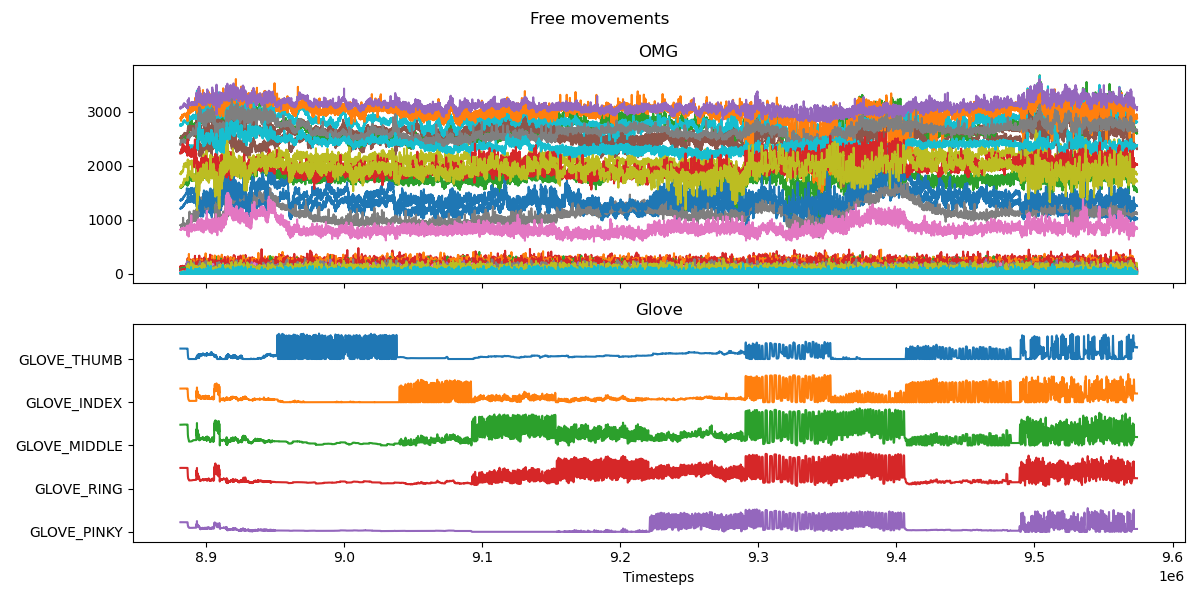

In [17]:
fig, axx = plt.subplots(2, 1, sharex=True, figsize=(12, 6))
plt.sca(axx[0])
plt.plot(free_movements['ts'].values, free_movements[OMG_CH].values)
plt.title('OMG')

plt.sca(axx[1])
plt.plot(free_movements['ts'].values, free_movements[GLOVE_CH].values - np.arange(len(GLOVE_CH)) * 1000)
plt.yticks(-np.arange(len(GLOVE_CH)) * 1000, GLOVE_CH)
plt.title('Glove')
plt.xlabel('Timesteps')

plt.suptitle('Free movements')
plt.tight_layout()